# **CNN Implementation for MNIST Digit Recognition**

In [ ]:
!pip install torch torchvision numpy matplotlib

## Data Preparation

In [ ]:
import numpy as np
import pandas as pd

# Import and access the dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# Gather features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Reshape & size features to 8x8 images dimensions and normalize pixel values
X = (X / 16.0).reshape(-1, 8, 8, 1)

# Print the shape of data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (3823, 8, 8, 1)
Shape of y: (3823,)


## Convolutional Neural Network Architecture

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 97802 (382.04 KB)
Trainable params: 97802 (382.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


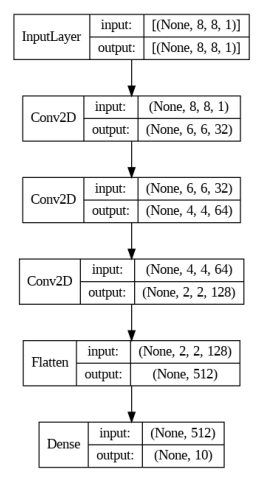

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Specify the CNN model architecture
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Flatten layer to prepare for fully connected layers
model.add(layers.Flatten())

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
print(model.summary())

# Plot the architecture diagram
tf.keras.utils.plot_model(model, to_file='CNN_architecture.png', show_shapes=True, show_layer_names=False)

# display the model architecture
img = plt.imread('CNN_architecture.png')
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


## Max Pooling

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN architecture with MaxPooling
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Flatten layer to prepare for fully connected layers
model.add(layers.Flatten())

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary after MaxPooling
print(model.summary())


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 128)       

## Fully Connected Layer and Softmax

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN architecture with Fully Connected Layer and Softmax
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Flatten layer to prepare for fully connected layers
model.add(layers.Flatten())

# Fully Connected Layer with relU activation
model.add(layers.Dense(128, activation='relu'))

# Output layer using softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Print the model summary
print(model.summary())


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 1, 1, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 1, 1, 128)         73856     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 1, 1, 128)       

## Training and Evaluation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Define the CNN architecture with Fully Connected Layer and Softmax
model = models.Sequential()

# Adding Fully Connected Layer and ReLU activation
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))

# Output layer using softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')



Epoch 1/5
375/375 [==============================] - 4s 8ms/step - loss: 0.3974 - accuracy: 0.8897 - val_loss: 0.2093 - val_accuracy: 0.9433
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1836 - accuracy: 0.9483 - val_loss: 0.1564 - val_accuracy: 0.9553
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1341 - accuracy: 0.9616 - val_loss: 0.1291 - val_accuracy: 0.9618
Epoch 4/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1046 - accuracy: 0.9700 - val_loss: 0.1149 - val_accuracy: 0.9649
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9692
Test accuracy: 0.9692000150680542


## Plot loss curves and accuracy metrics

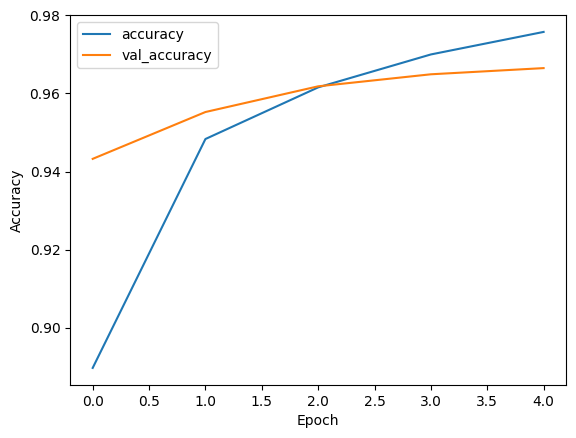

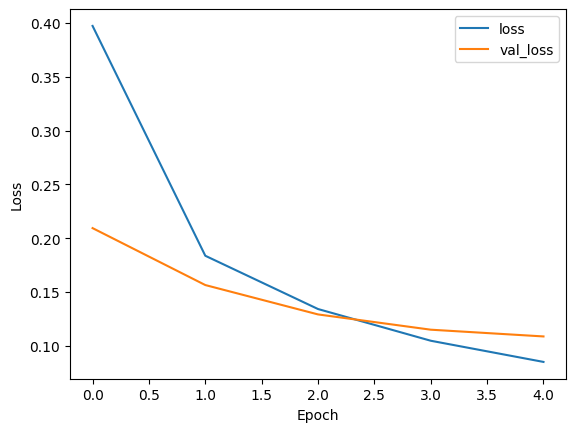

In [ ]:
# Plot loss curves and accuracy metrics
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Implement K-Fold cross-validation

In [ ]:
# Implement K-Fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for train_index, test_index in kfold.split(train_images, np.argmax(train_labels, axis=1)):
    X_train, X_val = train_images[train_index], train_images[test_index]
    y_train, y_val = train_labels[train_index], train_labels[test_index]
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))
    _, accuracy = model.evaluate(X_val, y_val)
    cv_scores.append(accuracy)
print(f'Cross-validation accuracy: {np.mean(cv_scores)}')



Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.3986 - accuracy: 0.8915 - val_loss: 0.2268 - val_accuracy: 0.9343
Epoch 2/5
375/375 [==============================] - 3s 7ms/step - loss: 0.1824 - accuracy: 0.9480 - val_loss: 0.1660 - val_accuracy: 0.9529
Epoch 3/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1314 - accuracy: 0.9618 - val_loss: 0.1329 - val_accuracy: 0.9628
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.1017 - accuracy: 0.9708 - val_loss: 0.1164 - val_accuracy: 0.9668
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.1065 - accuracy: 0.9704
Epoch 1/5
375/375 [==============================] - 3s 5ms/step - loss: 0.3880 - accuracy: 0.8947 - val_loss: 0.2259 - val_accuracy: 0.9376
Epoch 2/5
375/375 [==============================] - 2s 5ms/step - loss: 0.1814 - accuracy: 0.9493 - val_loss: 0.1637 - val_accuracy: 0.9542
Epoch 3/5
375/375 [==============================] - 3s

##Generate confusion matrix

In [ ]:
# Generate confusion matrix
predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.argmax(test_labels, axis=1)
cm = confusion_matrix(true_labels, predictions)
print('Confusion Matrix:')
print(cm)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 965    0    2    2    1    1    3    1    2    3]
 [   0 1122    5    0    0    1    3    0    4    0]
 [   4    0 1004    1    3    0    4    7    9    0]
 [   0    0   10  964    0    1    1    9   22    3]
 [   2    0    2    0  960    0    7    1    1    9]
 [   3    1    0   14    1  842   11    1   16    3]
 [   8    3    1    0    3    4  934    1    4    0]
 [   1    8   12    2    2    0    0  989    3   11]
 [   4    1    4    6    4    2    7    3  940    3]
 [   2    6    0    7   15    1    1    7    9  961]]


## Analysis and reporting

In [ ]:
# Analysis and reporting
from sklearn.metrics import classification_report
classification_rep = classification_report(true_labels, predictions)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.94      0.97       892
           6       0.96      0.97      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.93      0.97      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

